In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

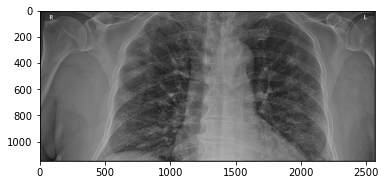

In [2]:
data_dir=r"C:\Users\Prince\Desktop\New folder (2)\dataset"
categories=["covid","normal"]
for catagory in categories:
    path= os.path.join(data_dir , catagory)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array , cmap='gray')
        plt.show()
        break
    break

In [3]:
print(img_array.shape)

(1148, 2563)


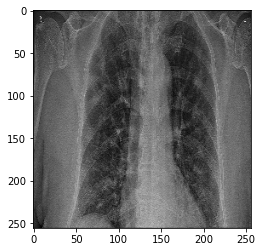

In [4]:
img_size=256
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [5]:
traning_data=[]
def create_traning_data():
    for catagory in categories:
        path= os.path.join(data_dir , catagory)
        class_num= categories.index(catagory)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                traning_data.append([new_array, class_num])
            except Exception as e:
                pass

create_traning_data()

In [6]:
print(len(traning_data))

50


In [7]:
import random
random.shuffle(traning_data)

In [8]:
for sample in traning_data:
    print(sample[1])

0
0
1
1
0
0
0
1
0
0
1
1
1
1
0
1
1
1
1
0
0
1
1
0
0
0
0
1
1
1
1
0
0
0
1
0
1
0
0
1
0
0
1
0
1
1
1
0
0
1


In [9]:
X=[]
y=[]

for features , labels in traning_data:
    X.append(features)
    y.append(labels)

X=np.array(X).reshape(-1, img_size,img_size,1)
y=np.array(y)

In [10]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()